In [ ]:
#g <- read.graph("movie_edge_weight.txt", format="ncol", directed=FALSE)

In [1]:
library("igraph")
load("com_Q10.RData")


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



In [2]:
#load("Name.RData")
#load("Rate.RData")
load("movie_graph.RData")

In [3]:
#V(g)$movie_name<-Name

In [10]:
#print(V(g)$rate[1:10])


In [11]:
#V(g)$rate<-Rate

Q9

Average rating of neighbors of Batman v Superman: Dawn of Justice (2016) is 6.326737

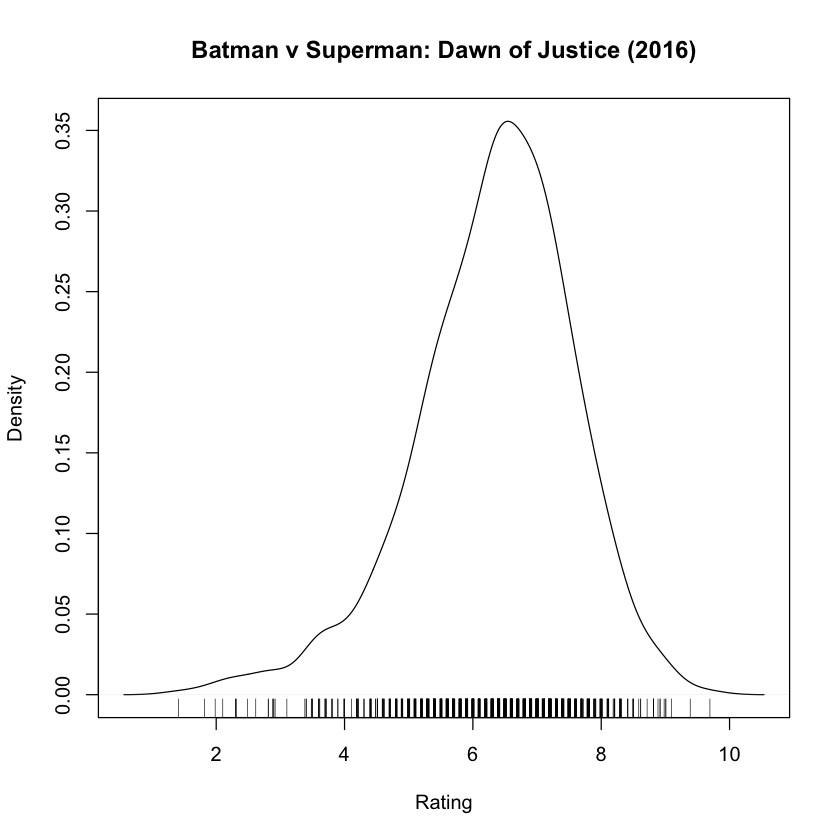

Average rating of neighbors of Mission: Impossible - Rogue Nation (2015) is 6.234195

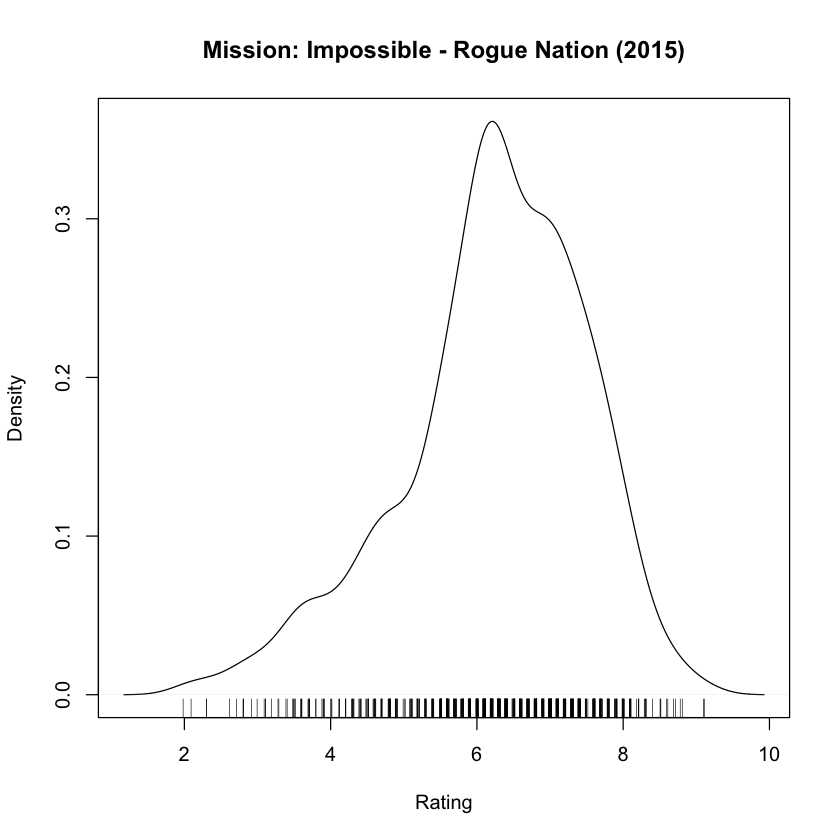

Average rating of neighbors of Minions (2015) is 6.82966

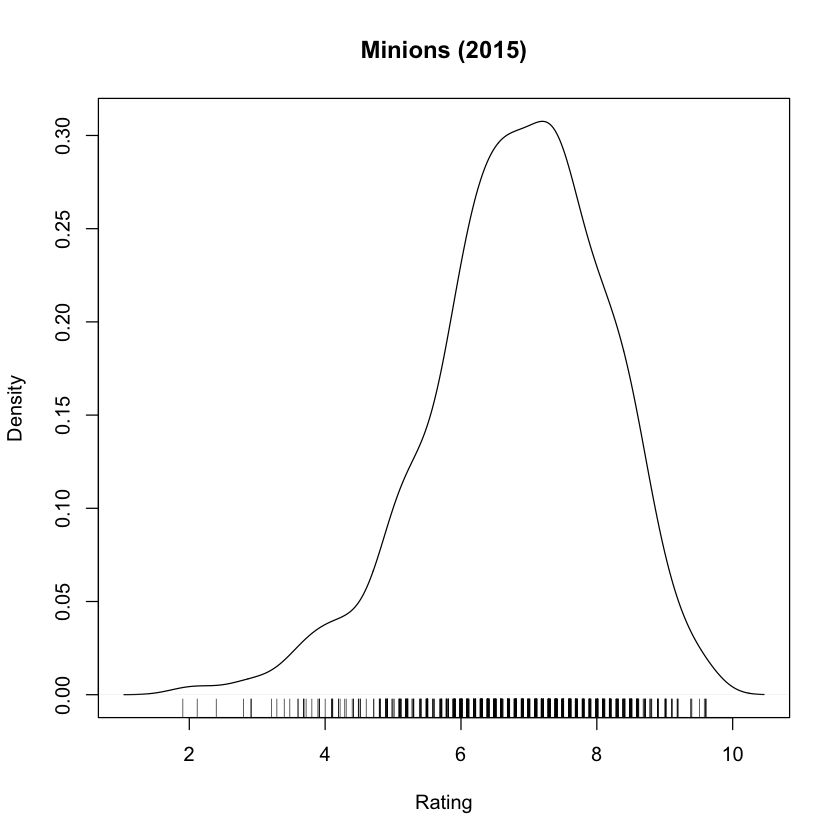

In [9]:
movie_interest<-c("Batman v Superman: Dawn of Justice (2016)",
                  "Mission: Impossible - Rogue Nation (2015)",
                  "Minions (2015)")
nei<-list()
interestId<-rep(0,3)
for(i in 1:3)
{ 
    nodeID<-(1:vcount(g))[V(g)$movie_name==movie_interest[i]]
    nei[[i]]<-neighbors(g,V(g)[nodeID])
    neigh_rate<-nei[[i]]$rate
    neigh_rate<-as.numeric(neigh_rate)
    neigh_rate<-neigh_rate[which(neigh_rate!=0)]
    sort(neigh_rate,decreasing=TRUE)
    plot(density(neigh_rate), xlab="Rating", main=V(g)[nodeID]$movie_name)
    rug(jitter(neigh_rate))
    cat("Average rating of neighbors of", V(g)[nodeID]$movie_name, "is", mean(neigh_rate))
}

The average rating of neighbors of Batman v Superman: Dawn of Justice (2016) is 6.326737 while the rating of the movie is 6.6. The average rating of neighbors of Mission: Impossible - Rogue Nation (2015) is 6.234195 while the rating of the movie is 7.4. The average rating of neighbors of Minions (2015) is 6.82966 while the rating of the movie is 6.4. The first and third movie have similar rating with the average of rating of their neighbor wih error less than 0.5. However, the rating of the second movie is quite different from the average rating of its neighbors and the difference is more than 1. So we cannot predict the rating of a movie by just calculating the average rating of its neighbors.

Q10

Average rating of neighbors of Batman v Superman: Dawn of Justice (2016) is 6.292999

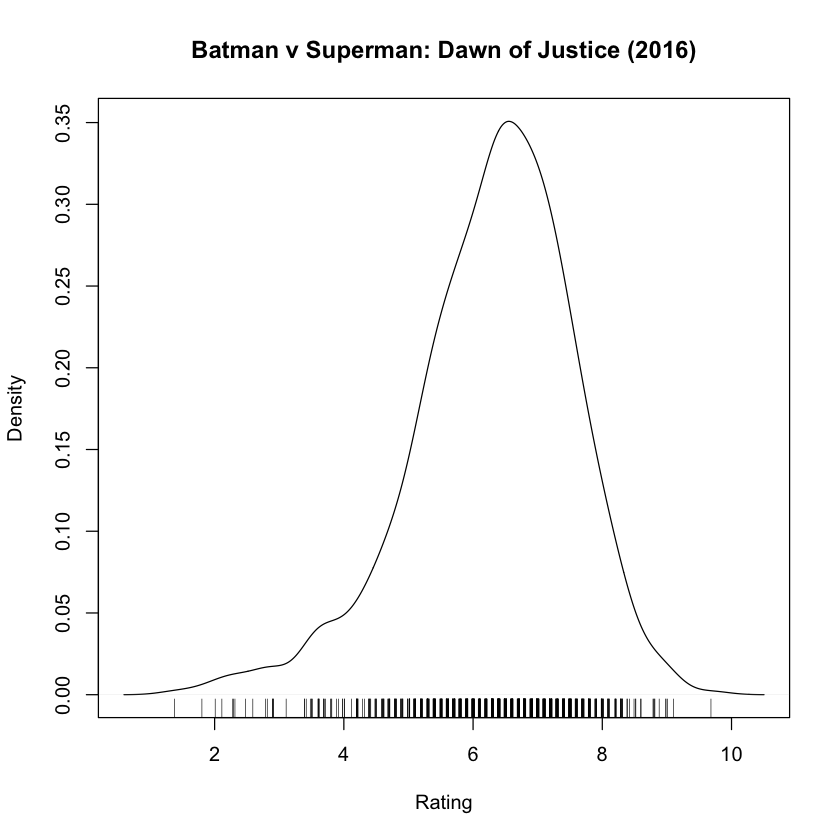

Average rating of neighbors of Mission: Impossible - Rogue Nation (2015) is 6.25939

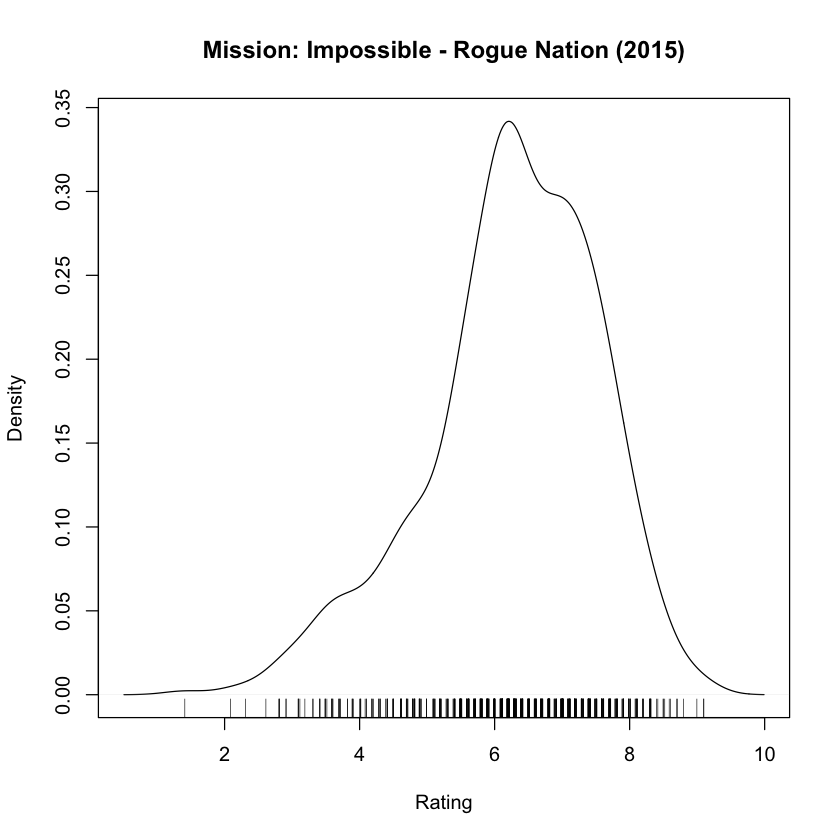

Average rating of neighbors of Minions (2015) is 6.950993

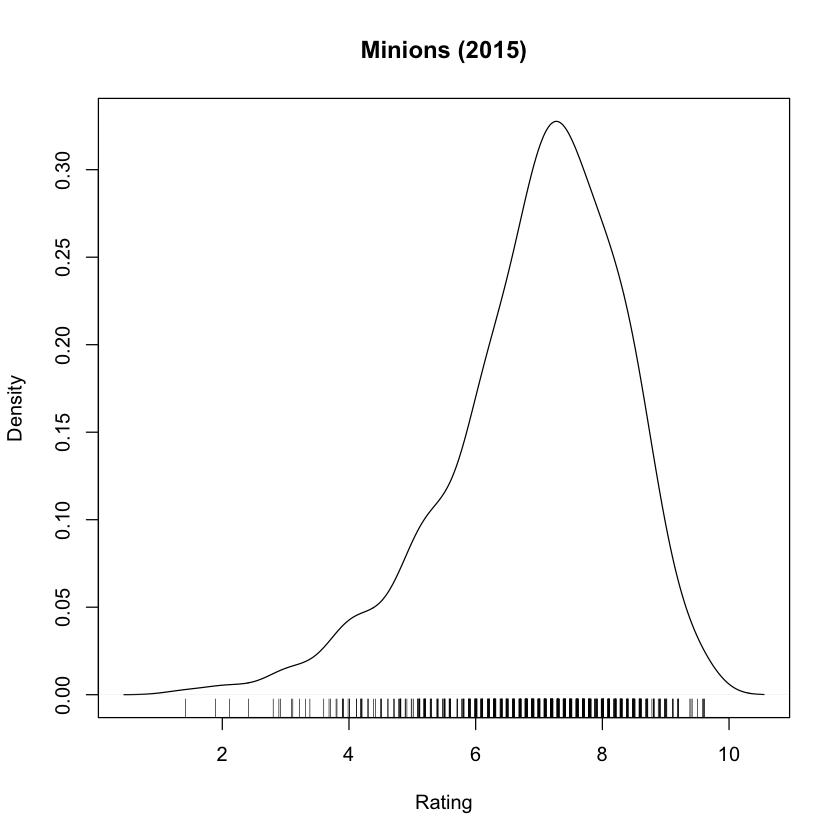

In [16]:
nei<-list()
r_nei<-list()
interestId<-rep(0,3)
r_rate<-c()
comId<-rep(0,3)
for(i in 1:3)
{ 
    nodeID<-(1:vcount(g))[V(g)$movie_name==movie_interest[i]]
    comId[i]<-com$membership[nodeID]

    nei[[i]]<-neighbors(g,V(g)[nodeID])
    index=1
    for(node in nei[[i]])
    {
        if(com$membership[node] == comId[i])
        {
          r_rate[index] = V(g)$rate[node]
          index=index+1
        }
    }
    r_rate<-as.numeric(r_rate)
    r_rate<-r_rate[which(r_rate!=0)]
    sort(r_rate,decreasing=TRUE)
    plot(density(r_rate), xlab="Rating", main=V(g)[nodeID]$movie_name)
    rug(jitter(r_rate))
    cat("Average rating of neighbors of", V(g)[nodeID]$movie_name, "is", mean(r_rate))
}

Q11

In [5]:
movie_interest<-c("Batman v Superman: Dawn of Justice (2016)",
                  "Mission: Impossible - Rogue Nation (2015)",
                  "Minions (2015)")
nei<-list()
comId<-rep(0,3)
interestId<-rep(0,3)
i<-1
{ 
    nodeID<-(1:vcount(g))[V(g)$movie_name==movie_interest[i]]
    tmp<-neighborhood(g,1,V(g)[nodeID])
    nei[[i]]<-tmp[[1]][2:length(tmp[[1]])]
    print(movie_interest[i])
    edge_weight <- rep(0,length(nei[[i]]))
    for(j in 1:length(nei[[i]]))
    {
    edge_weight[j] <- g[from=nodeID,to=nei[[i]][j]]
    }
    names(edge_weight)<-nei[[i]]
    edge_weight <- sort(edge_weight,decreasing=TRUE)
    nei_id<-as.numeric(names(edge_weight[1:5]))
    nei_name<-V(g)[nei_id]$movie_name
    print(nei_id)
    print(nei_name)
    for(n in nei_id)
    {
        print(com$membership[n])
    }
      
}

[1] "Batman v Superman: Dawn of Justice (2016)"
[1] 68050  2005 85953 85241  1992
[1] "Eloise (2015)"                      "The Justice League Part One (2017)"
[3] "Into the Storm (2014)"              "Love and Honor (2013)"             
[5] "Man of Steel (2013)"               
[1] 1
[1] 1
[1] 1
[1] 1
[1] 1


In [6]:
nei<-list()
comId<-rep(0,3)
interestId<-rep(0,3)
i<-2
{ 
    nodeID<-(1:vcount(g))[V(g)$movie_name==movie_interest[i]]
    tmp<-neighborhood(g,1,V(g)[nodeID])
    nei[[i]]<-tmp[[1]][2:length(tmp[[1]])]
    print(movie_interest[i])
    edge_weight <- rep(0,length(nei[[i]]))
    for(j in 1:length(nei[[i]]))
    {
    edge_weight[j] <- g[from=nodeID,to=nei[[i]][j]]
    }
    names(edge_weight)<-nei[[i]]
    edge_weight <- sort(edge_weight,decreasing=TRUE)
    nei_id<-as.numeric(names(edge_weight[1:5]))
    nei_name<-V(g)[nei_id]$movie_name
    print(nei_id)
    print(nei_name)
    for(n in nei_id)
    {
        print(com$membership[n])
    }
      
}

[1] "Mission: Impossible - Rogue Nation (2015)"
[1] 48283 48288 53559 56852 64645
[1] "Fan (2015)"                           
[2] "Phantom (2015)"                       
[3] "Breaking the Bank (2014)"             
[4] "Suffragette (2015)"                   
[5] "Now You See Me: The Second Act (2016)"
[1] 5
[1] 5
[1] 1
[1] 1
[1] 1


In [7]:
nei<-list()
comId<-rep(0,3)
interestId<-rep(0,3)
i<-3
{ 
    nodeID<-(1:vcount(g))[V(g)$movie_name==movie_interest[i]]
    tmp<-neighborhood(g,1,V(g)[nodeID])
    nei[[i]]<-tmp[[1]][2:length(tmp[[1]])]
    print(movie_interest[i])
    edge_weight <- rep(0,length(nei[[i]]))
    for(j in 1:length(nei[[i]]))
    {
    edge_weight[j] <- g[from=nodeID,to=nei[[i]][j]]
    }
    names(edge_weight)<-nei[[i]]
    edge_weight <- sort(edge_weight,decreasing=TRUE)
    nei_id<-as.numeric(names(edge_weight[1:5]))
    nei_name<-V(g)[nei_id]$movie_name
    print(nei_id)
    print(nei_name)
    for(n in nei_id)
    {
        print(com$membership[n])
    }
      
}

[1] "Minions (2015)"
[1] 103332   7131 125262   1545  60914
[1] "The Lorax (2012)"       "Inside Out (2015)"      "Up (2009)"             
[4] "Despicable Me 2 (2013)" "Surf's Up (2007)"      
[1] 7
[1] 7
[1] 7
[1] 7
[1] 7
